In [17]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [19]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [20]:
from citipy import citipy

In [21]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [22]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f499f98c49fd3fd9002fed1ce6a8894


In [23]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | necochea
Processing Record 2 of Set 1 | asayita
City not found. Skipping...
Processing Record 3 of Set 1 | serebryansk
Processing Record 4 of Set 1 | bengkulu
Processing Record 5 of Set 1 | vila do maio
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | vardo
Processing Record 8 of Set 1 | moron
Processing Record 9 of Set 1 | dudinka
Processing Record 10 of Set 1 | kaitangata
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | oranjemund
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | nago
Processing Record 16 of Set 1 | bambous virieux
Processing Record 17 of Set 1 | kasama
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | ostrovnoy
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | east london
Processing Record 22 o

Processing Record 36 of Set 4 | severo-kurilsk
Processing Record 37 of Set 4 | sakakah
Processing Record 38 of Set 4 | telimele
Processing Record 39 of Set 4 | evensk
Processing Record 40 of Set 4 | valparaiso
Processing Record 41 of Set 4 | codajas
Processing Record 42 of Set 4 | coahuayana
Processing Record 43 of Set 4 | tidore
City not found. Skipping...
Processing Record 44 of Set 4 | evans
Processing Record 45 of Set 4 | lashio
Processing Record 46 of Set 4 | talnakh
Processing Record 47 of Set 4 | opuwo
Processing Record 48 of Set 4 | chara
Processing Record 49 of Set 4 | port alfred
Processing Record 50 of Set 4 | oistins
Processing Record 1 of Set 5 | krasnoselkup
Processing Record 2 of Set 5 | boyolangu
Processing Record 3 of Set 5 | merauke
Processing Record 4 of Set 5 | tabuk
Processing Record 5 of Set 5 | itarema
Processing Record 6 of Set 5 | guarda
Processing Record 7 of Set 5 | sola
Processing Record 8 of Set 5 | praia da vitoria
Processing Record 9 of Set 5 | flagstaff


Processing Record 27 of Set 8 | colombo
Processing Record 28 of Set 8 | plouzane
Processing Record 29 of Set 8 | port victoria
Processing Record 30 of Set 8 | sur
Processing Record 31 of Set 8 | yulara
Processing Record 32 of Set 8 | barawe
City not found. Skipping...
Processing Record 33 of Set 8 | lolua
City not found. Skipping...
Processing Record 34 of Set 8 | mangrol
Processing Record 35 of Set 8 | surt
Processing Record 36 of Set 8 | kavaratti
Processing Record 37 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 38 of Set 8 | dalmeny
Processing Record 39 of Set 8 | tondano
Processing Record 40 of Set 8 | san cristobal
Processing Record 41 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 42 of Set 8 | gamba
Processing Record 43 of Set 8 | leningradskiy
Processing Record 44 of Set 8 | salalah
Processing Record 45 of Set 8 | straumen
Processing Record 46 of Set 8 | segovia
Processing Record 47 of Set 8 | college
Processing Record 48 of

Processing Record 12 of Set 12 | ayan
Processing Record 13 of Set 12 | freeport
Processing Record 14 of Set 12 | murdochville
Processing Record 15 of Set 12 | kinablangan
Processing Record 16 of Set 12 | calabozo
Processing Record 17 of Set 12 | guadix
Processing Record 18 of Set 12 | camacupa
Processing Record 19 of Set 12 | el chol
Processing Record 20 of Set 12 | puerto escondido
Processing Record 21 of Set 12 | mocambique
City not found. Skipping...
Processing Record 22 of Set 12 | bagdarin
Processing Record 23 of Set 12 | leshukonskoye
Processing Record 24 of Set 12 | falealupo
City not found. Skipping...
Processing Record 25 of Set 12 | peniche
Processing Record 26 of Set 12 | sabha
Processing Record 27 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 28 of Set 12 | shreveport
Processing Record 29 of Set 12 | adrar
Processing Record 30 of Set 12 | lokoja
Processing Record 31 of Set 12 | katakwi
Processing Record 32 of Set 12 | babanusah
City not found. Skipping...
Processi

In [28]:
len("city_data")

9

In [29]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Necochea,-38.5473,-58.7368,70.00,50,83,5.99,AR,2021-04-01 15:41:32
1,Serebryansk,49.6925,83.2892,28.40,69,17,4.47,KZ,2021-04-01 15:43:00
2,Bengkulu,-3.8004,102.2655,76.19,89,100,8.63,ID,2021-04-01 15:43:00
3,Vila Do Maio,15.1333,-23.2167,80.60,44,0,19.57,CV,2021-04-01 15:43:01
4,Ushuaia,-54.8000,-68.3000,55.40,47,20,5.75,AR,2021-04-01 15:39:15
5,Vardo,70.3705,31.1107,32.90,82,99,9.91,NO,2021-04-01 15:43:01
6,Moron,-34.6534,-58.6198,73.40,56,40,11.50,AR,2021-04-01 15:43:01
7,Dudinka,69.4058,86.1778,-17.21,96,19,6.73,RU,2021-04-01 15:43:01
8,Kaitangata,-46.2817,169.8464,60.01,62,100,5.01,NZ,2021-04-01 15:43:02
9,Punta Arenas,-53.1500,-70.9167,50.00,76,0,10.36,CL,2021-04-01 15:42:59


In [30]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Necochea,AR,2021-04-01 15:41:32,-38.5473,-58.7368,70.00,50,83,5.99
1,Serebryansk,KZ,2021-04-01 15:43:00,49.6925,83.2892,28.40,69,17,4.47
2,Bengkulu,ID,2021-04-01 15:43:00,-3.8004,102.2655,76.19,89,100,8.63
3,Vila Do Maio,CV,2021-04-01 15:43:01,15.1333,-23.2167,80.60,44,0,19.57
4,Ushuaia,AR,2021-04-01 15:39:15,-54.8000,-68.3000,55.40,47,20,5.75
5,Vardo,NO,2021-04-01 15:43:01,70.3705,31.1107,32.90,82,99,9.91
6,Moron,AR,2021-04-01 15:43:01,-34.6534,-58.6198,73.40,56,40,11.50
7,Dudinka,RU,2021-04-01 15:43:01,69.4058,86.1778,-17.21,96,19,6.73
8,Kaitangata,NZ,2021-04-01 15:43:02,-46.2817,169.8464,60.01,62,100,5.01
9,Punta Arenas,CL,2021-04-01 15:42:59,-53.1500,-70.9167,50.00,76,0,10.36


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

PermissionError: [Errno 13] Permission denied: 'weather_data/cities.csv'

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

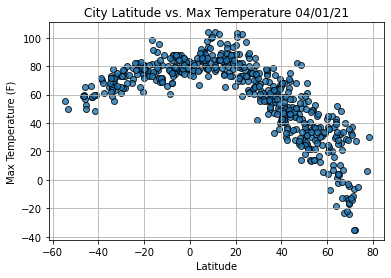

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

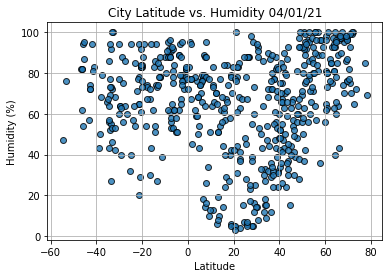

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

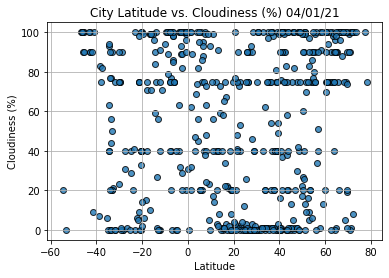

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

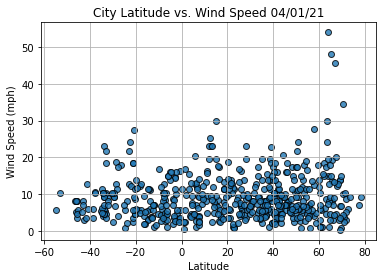

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [38]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [39]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Serebryansk,KZ,2021-04-01 15:43:00,49.6925,83.2892,28.40,69,17,4.47
3,Vila Do Maio,CV,2021-04-01 15:43:01,15.1333,-23.2167,80.60,44,0,19.57
5,Vardo,NO,2021-04-01 15:43:01,70.3705,31.1107,32.90,82,99,9.91
7,Dudinka,RU,2021-04-01 15:43:01,69.4058,86.1778,-17.21,96,19,6.73
12,Nago,JP,2021-04-01 15:43:03,26.5881,127.9761,75.20,88,90,5.75


In [40]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

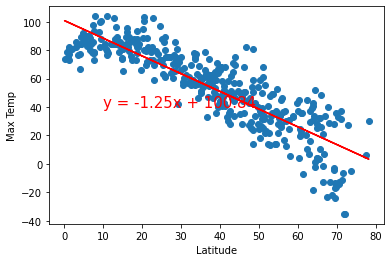

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

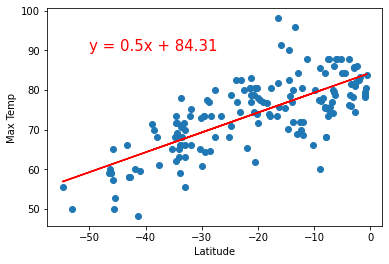

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

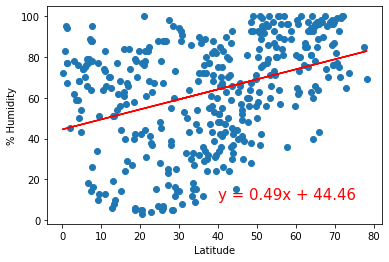

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

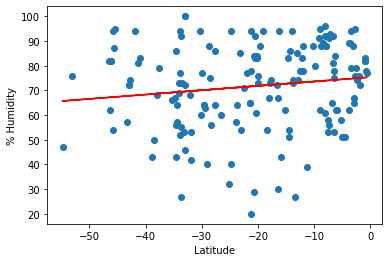

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

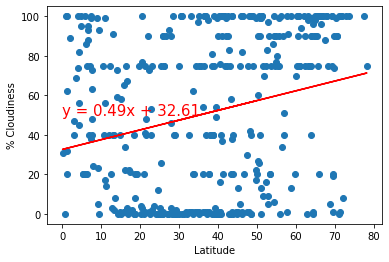

In [47]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,50))

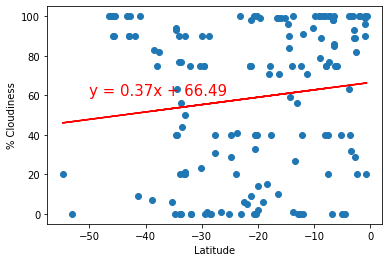

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

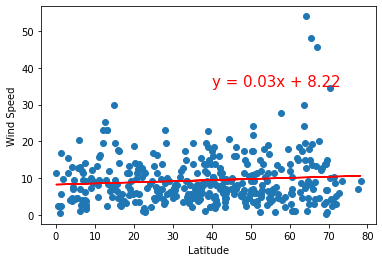

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

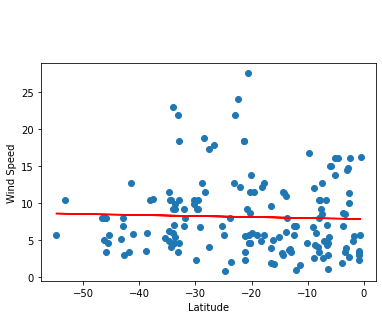

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))